In [1]:
%%cpp -d

#include "sPhenixStyle.C"

TFile *_file0 = NULL;
TTree *T(nullptr);

In [2]:
gSystem->Load("libg4eval.so");

SetsPhenixStyle();
TVirtualFitter::SetDefaultFitter("Minuit2");
gStyle->SetLegendTextSize(0);

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
const TString infile = "G4EICDetector_DSTReader.root";

if (!_file0)
{
    TString chian_str = infile;
    chian_str.ReplaceAll("ALL", "*");

    TChain *t = new TChain("T");
    const int n = t->Add(chian_str);

    cout << "Loaded " << n << " root files with eventT in " << chian_str << endl;
    assert(n > 0);

    T = t;

    _file0 = new TFile;
    _file0->SetName(infile);
}
//
// description = desc;

Loaded 1 root files with eventT in G4EICDetector_DSTReader.root


In [4]:
T->Show(0)

======> EVENT:0
 n_G4HIT_MVTX    = 0
 n_G4HIT_TPC     = 0
 n_G4HIT_EGEM_0  = 0
 n_G4HIT_EGEM_1  = 0
 n_G4HIT_EGEM_2  = 0
 n_G4HIT_EGEM_3  = 0
 n_G4HIT_FGEM_2  = 0
 n_G4HIT_FGEM_3  = 0
 n_G4HIT_FGEM_4  = 0
 n_G4HIT_RICH    = 0
 n_G4HIT_BH_1    = 0
 n_G4HIT_BH_FORWARD_PLUS = 1
 G4HIT_BH_FORWARD_PLUS = 1
 G4HIT_BH_FORWARD_PLUS.fUniqueID = 0
 G4HIT_BH_FORWARD_PLUS.fBits = 50331648
 G4HIT_BH_FORWARD_PLUS.x[2] = 11.225494 , 11.225495 

 G4HIT_BH_FORWARD_PLUS.y[2] = -0.004178 , -0.004178 

 G4HIT_BH_FORWARD_PLUS.z[2] = 450.000122 , 450.000183 

 G4HIT_BH_FORWARD_PLUS.t[2] = 14.988375 , 14.988377 

 G4HIT_BH_FORWARD_PLUS.hitid = 4294967297
 G4HIT_BH_FORWARD_PLUS.trackid = 1
 G4HIT_BH_FORWARD_PLUS.showerid = 1
 G4HIT_BH_FORWARD_PLUS.edep = 274.085175
 G4HIT_BH_FORWARD_PLUS.prop_map = (map<unsigned char,unsigned int>*)0x7f199662abf8
 G4HIT_BH_FORWARD_PLUS.eion = nan
 G4HIT_BH_FORWARD_PLUS.scint_id = -2147483648
 G4HIT_BH_FORWARD_PLUS.light_yield = nan
 G4HIT_BH_FORWARD_PLUS.path_length = nan
 n_

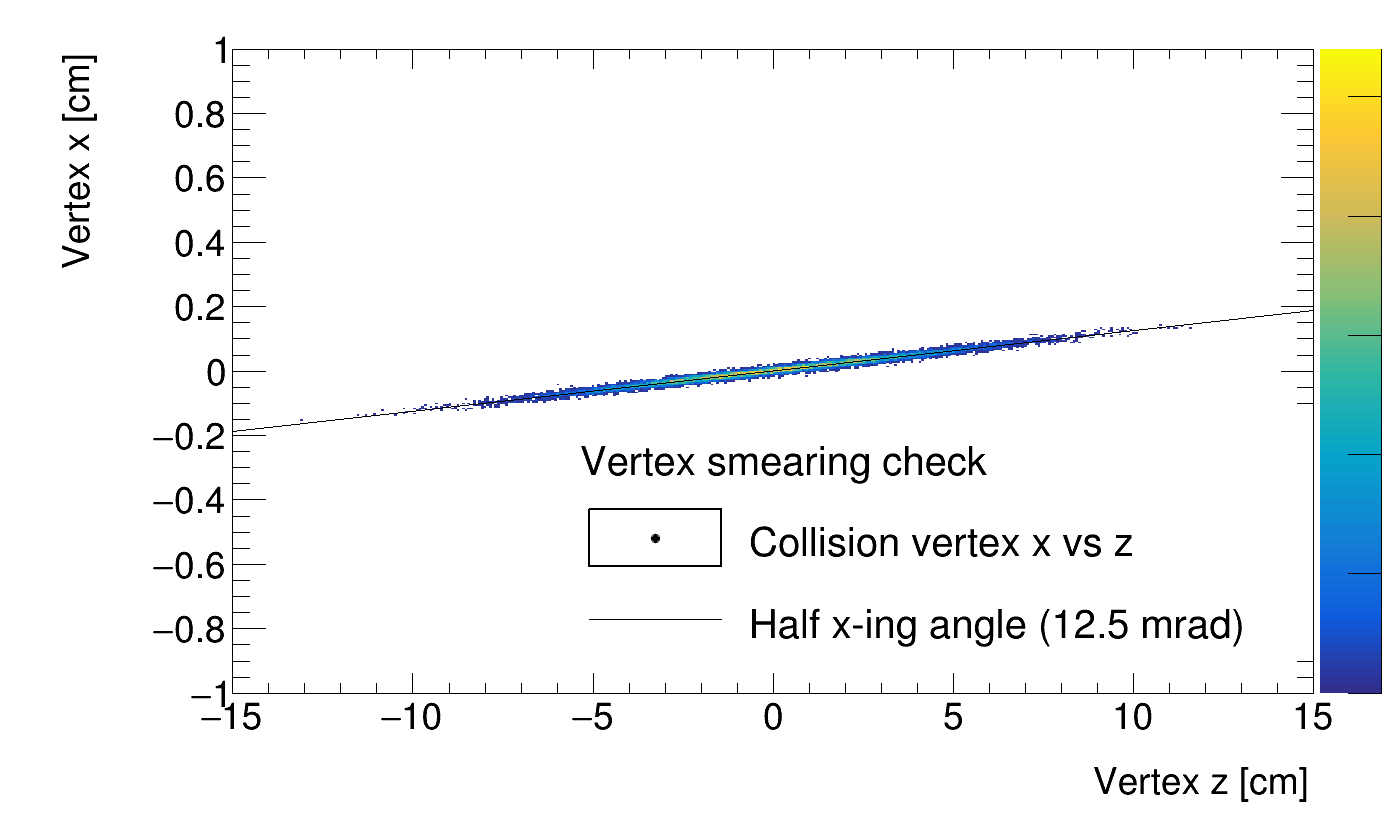

In [5]:
{
    TCanvas *c1 = new TCanvas("TrackQA", "TrackQA", 1400, 860);
    c1->Divide(1, 1);
    int idx = 1;
    TPad *p = nullptr;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    
    
    TH2F *hvxvz = new TH2F("hvxvz", ";Vertex z [cm];Vertex x [cm]",400,-15,15,400,-1,1);
    T->Draw("PHG4VtxPoint.vx:PHG4VtxPoint.vz>>hvxvz","n_PHG4VtxPoint==1","colz");
    
    TLine * l = new TLine(-15,-15*tan(25e-3 / 2.),15,15*tan(25e-3 / 2.));
    l->Draw();
    
    TLegend *leg = new TLegend(.4, .2, .95, .5,  + "Vertex smearing check");
    leg->AddEntry(hvxvz, "Collision vertex x vs z","fp");
    leg->AddEntry(l, "Half x-ing angle (12.5 mrad)", "l");
    leg->Draw();
    
    c1->Draw();

}

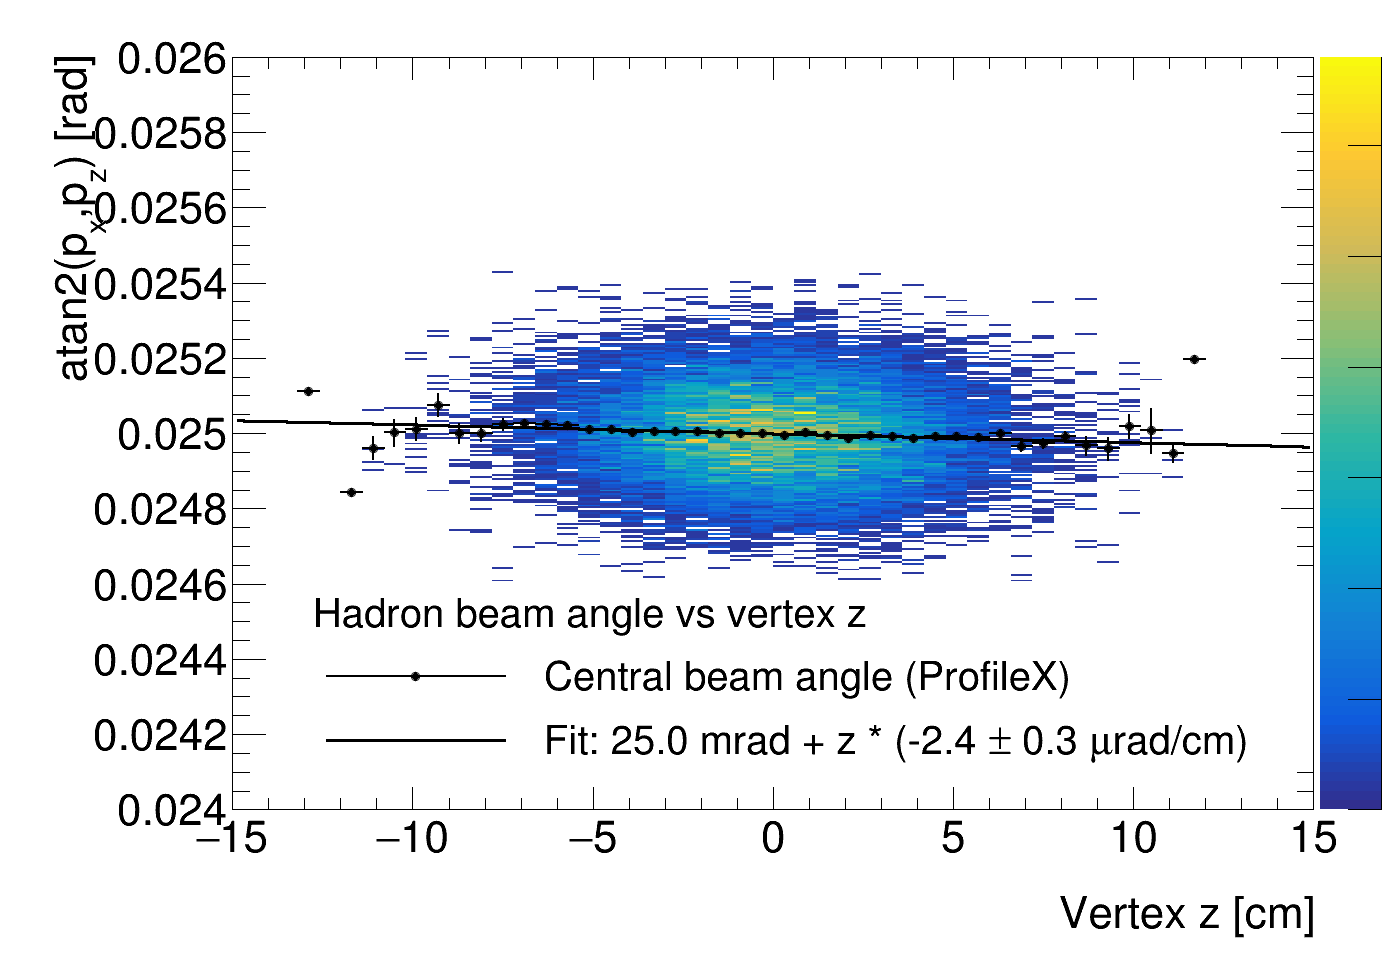


****************************************
Minimizer is Linear
Chi2                      =      35.6435
NDf                       =           36
p0                        =    0.0249993   +/-   9.18471e-07 
p1                        = -2.35096e-06   +/-   2.86432e-07 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: TrackQA


In [6]:
{
    TCanvas *c1 = new TCanvas("TrackQA", "TrackQA", 1400, 1000);
    c1->Divide(1, 1);
    int idx = 1;
    TPad *p = nullptr;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    
    
    TH2F *hpxvz = new TH2F("hpxvz", ";Vertex z [cm];atan2(p_{x},p_{z}) [rad]",50,-15,15,400,24e-3,26e-3);
    T->Draw("atan2(PHG4Particle.fpx,PHG4Particle.fpz):PHG4VtxPoint.vz>>hpxvz","n_PHG4VtxPoint==1 && n_PHG4Particle==2 && PHG4Particle.fpz>0","colz");
    TProfile * hpxvz_pfx = hpxvz->ProfileX();
    hpxvz_pfx -> Draw("same");
    
    TF1 * fpol1 = new TF1("fpol1","pol1");
    
    hpxvz_pfx->Fit(fpol1);
    
    
    TLegend *leg = new TLegend(.2, .2, .95, .4,  + "Hadron beam angle vs vertex z");
    leg->AddEntry(hpxvz_pfx, "Central beam angle (ProfileX)","lp");
    leg->AddEntry(fpol1, Form("Fit: %.1f mrad + z * (%.1f #pm %.1f #murad/cm)", 
                              fpol1->GetParameter(0)*1e3, 
                              fpol1->GetParameter(1)*1e6,fpol1->GetParError(1)*1e6), "l");
    leg->Draw();
    
    c1->Draw();

}

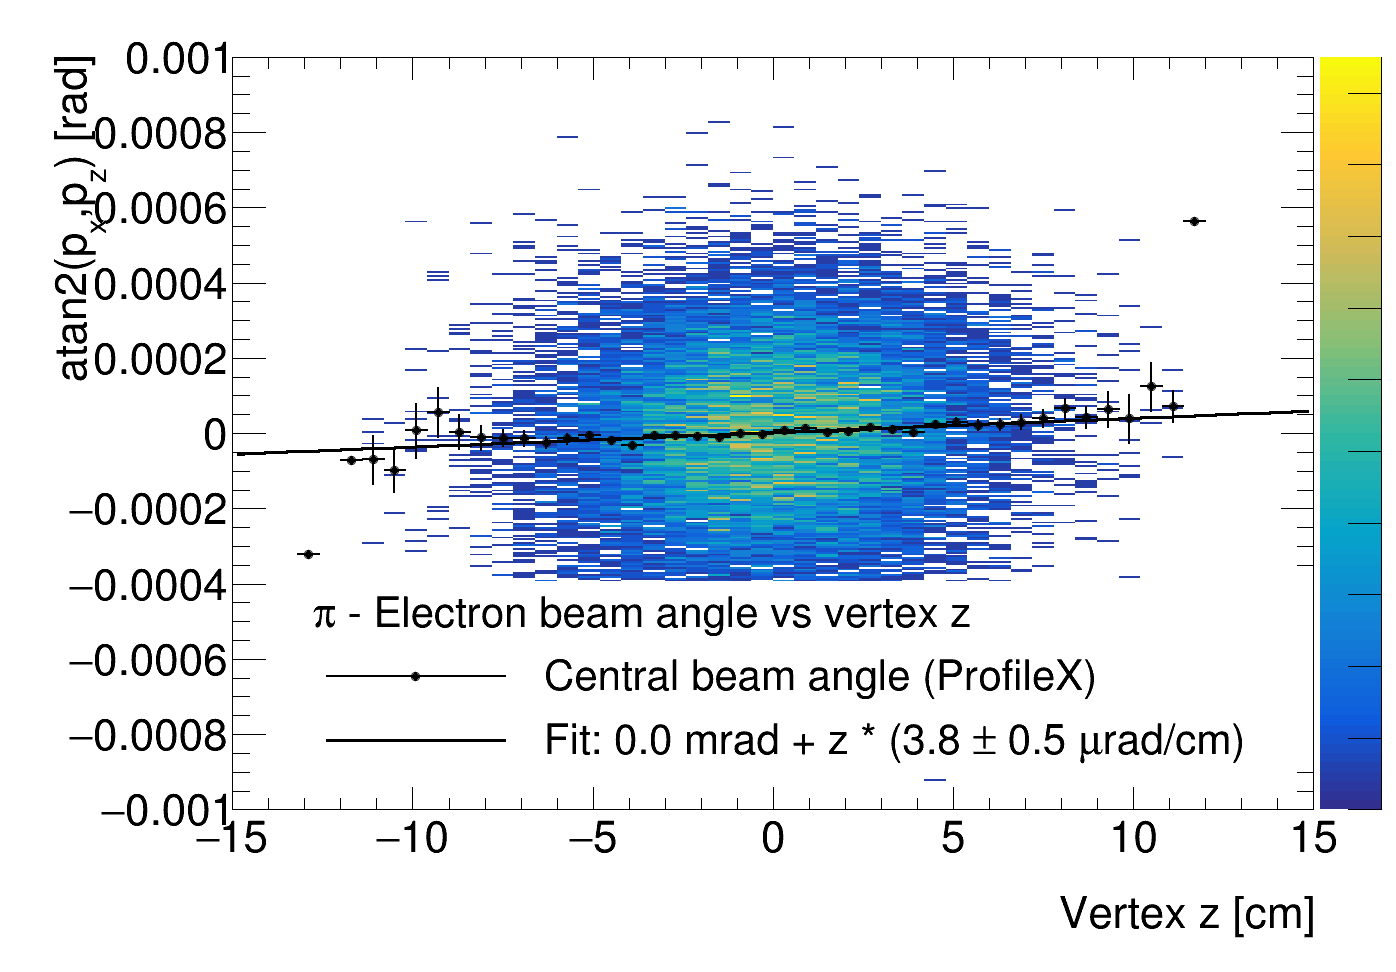


****************************************
Minimizer is Linear
Chi2                      =      24.2616
NDf                       =           36
p0                        =  2.31277e-06   +/-   1.64454e-06 
p1                        =  3.81687e-06   +/-   5.11908e-07 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: TrackQA
Warning in <TROOT::Append>: Replacing existing TH1: hpxvz (Potential memory leak).


In [7]:
{
    TCanvas *c1 = new TCanvas("TrackQA", "TrackQA", 1400, 1000);
    c1->Divide(1, 1);
    int idx = 1;
    TPad *p = nullptr;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
        
    TH2F *hpxvz = new TH2F("hpxvz", ";Vertex z [cm];atan2(p_{x},p_{z}) [rad]",50,-15,15,400,-1e-3,1e-3);
    //TH2F *hpxvz = new TH2F("hpxvz", ";Vertex z [cm];atan2(p_{x},-p_{z}) [rad]",50,-15,15,400,-1,1);
    T->Draw("atan2(PHG4Particle[1].fpx,-PHG4Particle[1].fpz) : PHG4VtxPoint[0].vz>>hpxvz", "n_PHG4VtxPoint==1 && n_PHG4Particle==2 && PHG4Particle[1].fpz<0","colz");
    
    TProfile * hpxvz_pfx = hpxvz->ProfileX();
    hpxvz_pfx -> Draw("same");
    
    TF1 * fpol1 = new TF1("fpol1","pol1");
    
    hpxvz_pfx->Fit(fpol1);
    
    TLegend *leg = new TLegend(.2, .2, .95, .4,  + "#pi - Electron beam angle vs vertex z");
    leg->AddEntry(hpxvz_pfx, "Central beam angle (ProfileX)","lp");
    leg->AddEntry(fpol1, Form("Fit: %.1f mrad + z * (%.1f #pm %.1f #murad/cm)", 
                              fpol1->GetParameter(0)*1e3, 
                              fpol1->GetParameter(1)*1e6,fpol1->GetParError(1)*1e6), "l");
    leg->Draw();
    
    c1->Draw();

}

In [8]:
{
    const double EIC_hadron_crossing_angle = 25e-3;
    const double z_hadron_cavity = 52e2;  // CDR Fig 3.3
    const double z_e_cavity = 38e2;       // CDR Fig 3.2
    
    cout <<-EIC_hadron_crossing_angle / 2. / z_hadron_cavity<<endl;
    cout <<-EIC_hadron_crossing_angle / 2. / z_e_cavity<<endl;
}

-2.40385e-06
-3.28947e-06


.x Fun4All_G4_EICDetector.C
TFile *_file0 = TFile::Open("G4EICDetector_DSTReader.root")
.ls
T->Show(0)
T->Draw("PHG4VtxPoint.vx:PHG4VtxPoint.vz","n_PHG4VtxPoint==1")
T->Draw("PHG4Particle.fpx:PHG4VtxPoint.vz","n_PHG4VtxPoint==1 && n_PHG4Particle==2")
.ls
T->Draw("PHG4Particle.fpx/PHG4Particle.fpz:PHG4VtxPoint.vz>>hpxz(100,-15,15,100,20e-3,30e-3)","n_PHG4VtxPoint==1 && n_PHG4Particle==2")
hpxz->ProfileY()
.ls
hpxz_pfy->Draw("same")
hpxz_pfy->Draw()
hpxz->ProfileX()
T->Draw("PHG4Particle.fpx/PHG4Particle.fpz:PHG4VtxPoint.vz>>hpxz(100,-15,15,100,20e-3,30e-3)","n_PHG4VtxPoint==1 && n_PHG4Particle==2")
hpxz_pfx->Draw("same")
T->Draw("PHG4Particle.fpx/PHG4Particle.fpz:PHG4VtxPoint.vz>>hpxz(100,-15,15,100,20e-3,30e-3)","n_PHG4VtxPoint==1 && n_PHG4Particle==2 && PHG4Particle.fpz>0")
T->Draw("PHG4Particle.fpx/PHG4Particle.fpz:PHG4VtxPoint.vz>>hpxz(100,-15,15,100,20e-3,30e-3)","n_PHG4VtxPoint==1 && n_PHG4Particle==2 && PHG4Particle.fpz<0")
hpxz->ProfileX()hpxz_pfx->Draw("same")
hpxz->ProfileX()
hpxz_pfx->Draw("same")